Importing libraries

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, make_scorer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC

Loading the dataset

In [3]:
data = pd.read_csv('games.csv', header=0, sep=',')
data.head()

,White player,White player Elo,Black player,Black player Elo,Opening Code,Opening,Result
0,Richard_Rapport,2745,Kirill_Shevchenko,2684,B31,Sicilian Defence,1-0
1,Radoslaw_Wojtaszek,2670,Magnus_Carlsen,2853,A40,A40–A42,1-0
2,Wesley_So,2760,Bogdan-Daniel_Deac,2700,C50,Italian Game,1-0
3,Jan_Krzysztof_Duda,2724,Anish_Giri,2768,E60,King’s Indian,1-0
4,Maxime_Vachier_Lagrave,2742,Levon_Aronian,2745,A45,A45–A49,½-½


Checking for missing values

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11937 entries, 0 to 11936
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   White player      11937 non-null  object
 1   White player Elo  11937 non-null  int64 
 2   Black player      11937 non-null  object
 3   Black player Elo  11937 non-null  int64 
 4   Opening Code      11937 non-null  object
 5   Opening           11937 non-null  object
 6   Result            11937 non-null  object
dtypes: int64(2), object(5)
memory usage: 652.9+ KB


There is no missing data in the dataset.

Checking each result type count

C:\Users\piotr\.conda\envs\MSID\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\piotr\.conda\envs\MSID\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\piotr\.conda\envs\MSID\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


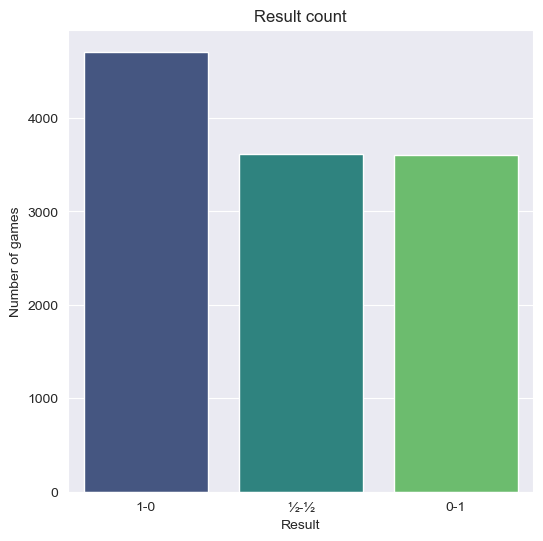

In [5]:
result_counts = data['Result'].value_counts()

plt.figure(figsize=(6, 6))
sns.barplot(x=result_counts.index, y=result_counts.values, palette='viridis')
plt.title('Result count')
plt.xlabel('Result')
plt.ylabel('Number of games')
plt.show()

Checking percentage of each result type based on white player Elo.

C:\Users\piotr\AppData\Local\Temp\ipykernel_8596\1597419508.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_grouped = data.groupby('Elo Range')['Result Type'].value_counts(normalize=True).mul(100).reset_index(name='Percentage')
C:\Users\piotr\.conda\envs\MSID\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\piotr\.conda\envs\MSID\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this war

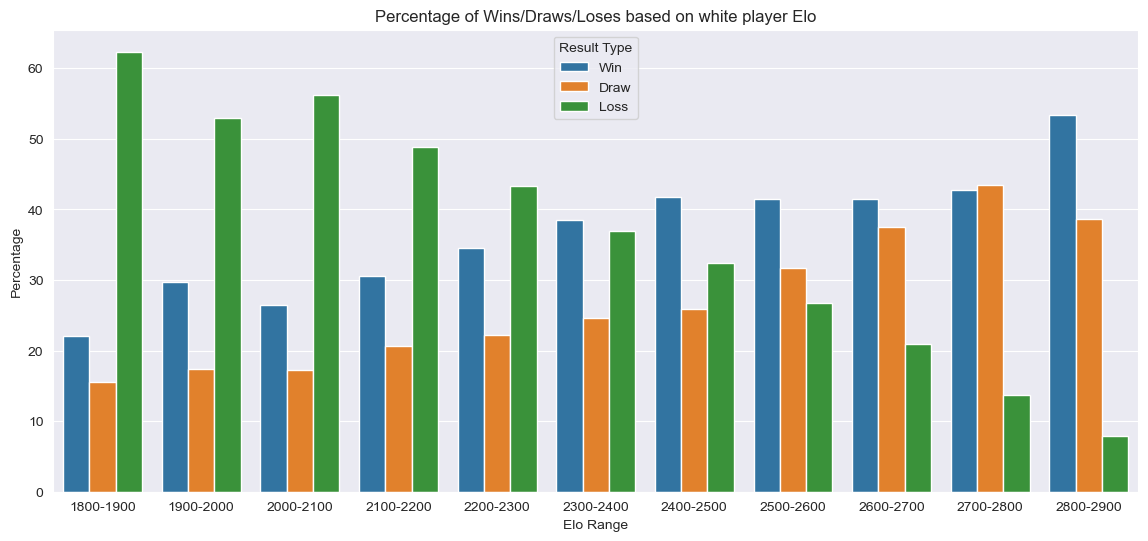

In [6]:
bins = [1800, 1900,2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900]
labels = ['1800-1900', '1900-2000', '2000-2100', '2100-2200', '2200-2300', '2300-2400', '2400-2500', '2500-2600', '2600-2700', '2700-2800', '2800-2900']
data['Elo Range'] = pd.cut(data['White player Elo'], bins=bins, labels=labels)
data['Result Type'] = data['Result'].map({'1-0': 'Win','½-½': 'Draw', '0-1': 'Loss'})

data_grouped = data.groupby('Elo Range')['Result Type'].value_counts(normalize=True).mul(100).reset_index(name='Percentage')

plt.figure(figsize=(14,6))
sns.barplot(x='Elo Range', y='Percentage', hue='Result Type', data=data_grouped, hue_order=['Win', 'Draw', 'Loss'])
plt.title('Percentage of Wins/Draws/Loses based on white player Elo')
plt.show()

Checking each result type based on Elo difference.

C:\Users\piotr\.conda\envs\MSID\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\piotr\.conda\envs\MSID\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\piotr\.conda\envs\MSID\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


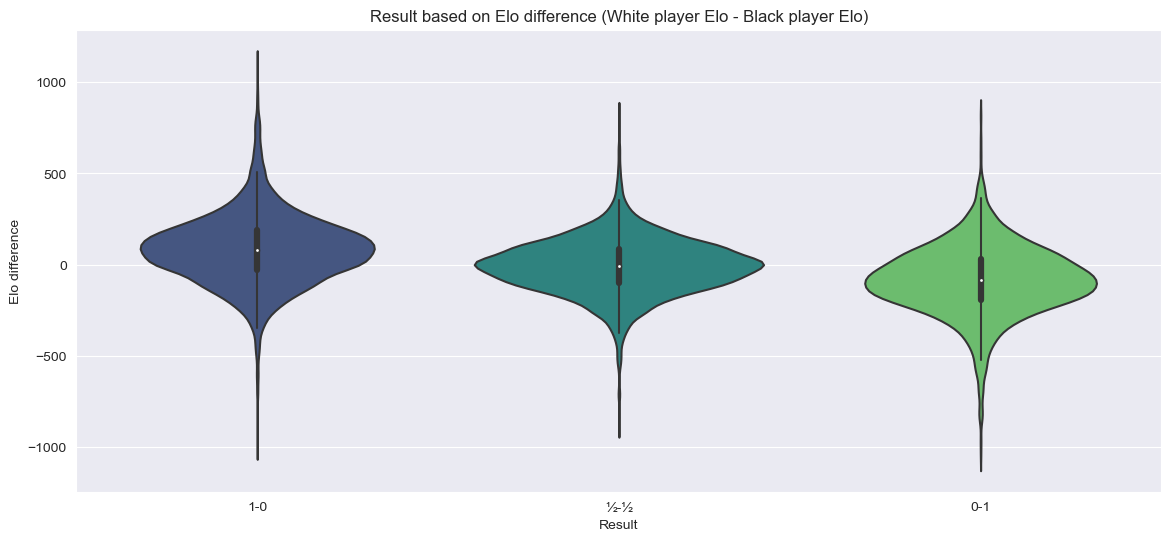

In [7]:
data['Elo Difference'] = data['White player Elo'] - data['Black player Elo']

plt.figure(figsize=(14, 6))
sns.violinplot(x='Result', y='Elo Difference', data=data, palette='viridis')
plt.title('Result based on Elo difference (White player Elo - Black player Elo)')
plt.xlabel('Result')
plt.ylabel('Elo difference')
plt.show()

Most popular openings.

C:\Users\piotr\.conda\envs\MSID\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\piotr\.conda\envs\MSID\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\piotr\.conda\envs\MSID\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


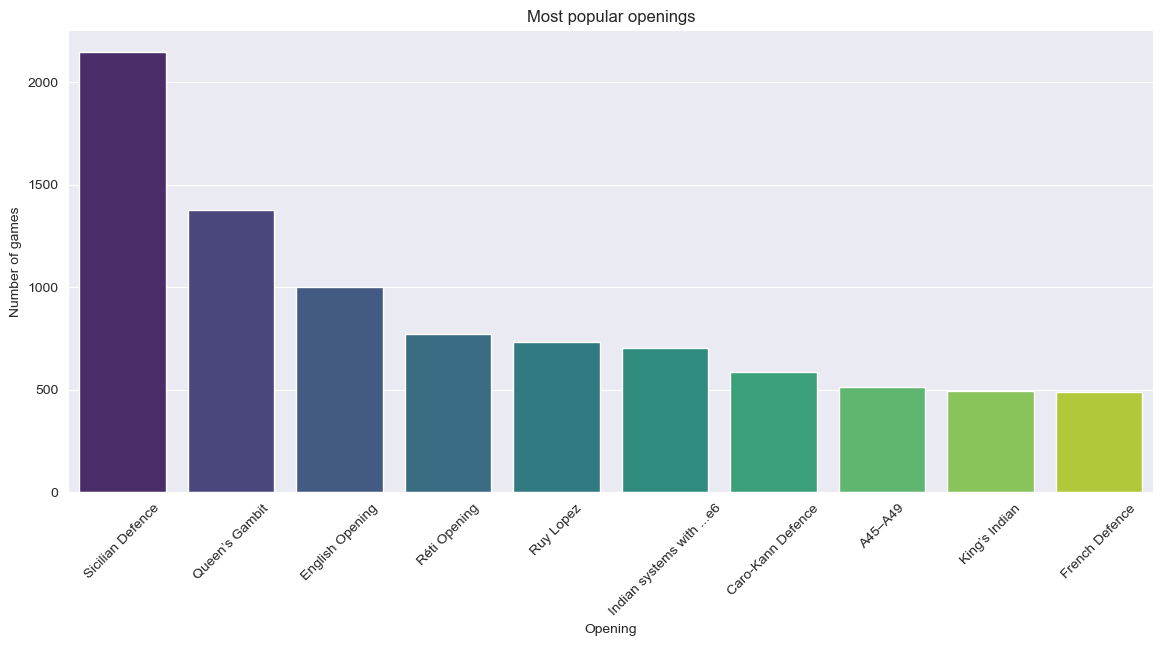

In [8]:
opening_counts = data['Opening'].value_counts().head(10)

plt.figure(figsize=(14, 6))
sns.barplot(x=opening_counts.index, y=opening_counts.values, palette='viridis')
plt.title('Most popular openings')
plt.xlabel('Opening')
plt.ylabel('Number of games')
plt.xticks(rotation=45)
plt.show()

Openings with highest winrate as white player.

C:\Users\piotr\.conda\envs\MSID\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\piotr\.conda\envs\MSID\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\piotr\.conda\envs\MSID\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Openings with highest winrate as white player')

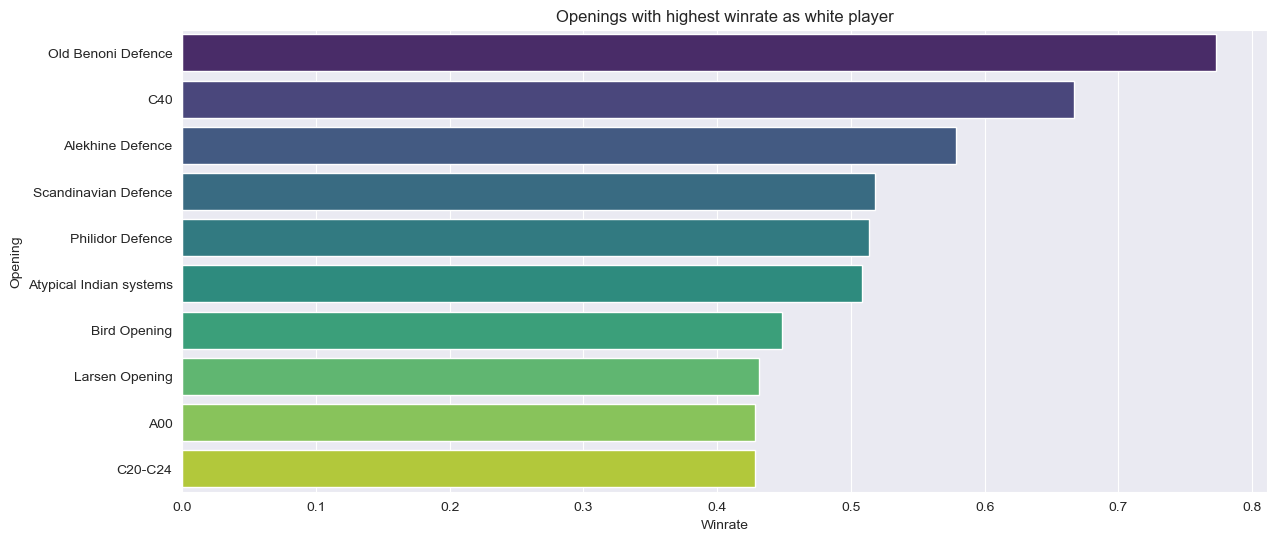

In [9]:
opening_grouped = data.groupby('Opening')['Result'].value_counts(normalize=True).unstack().fillna(0)
opening_grouped['Winrate'] = opening_grouped['1-0']
opening_grouped = opening_grouped.sort_values(by='Winrate', ascending=False).head(10)

plt.figure(figsize=(14, 6))
sns.barplot(x=opening_grouped['Winrate'], y=opening_grouped.index, palette='viridis')
plt.title('Openings with highest winrate as white player')

Openings with highest winrate as black player.

C:\Users\piotr\.conda\envs\MSID\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\piotr\.conda\envs\MSID\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\piotr\.conda\envs\MSID\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Openings with highest winrate as black player')

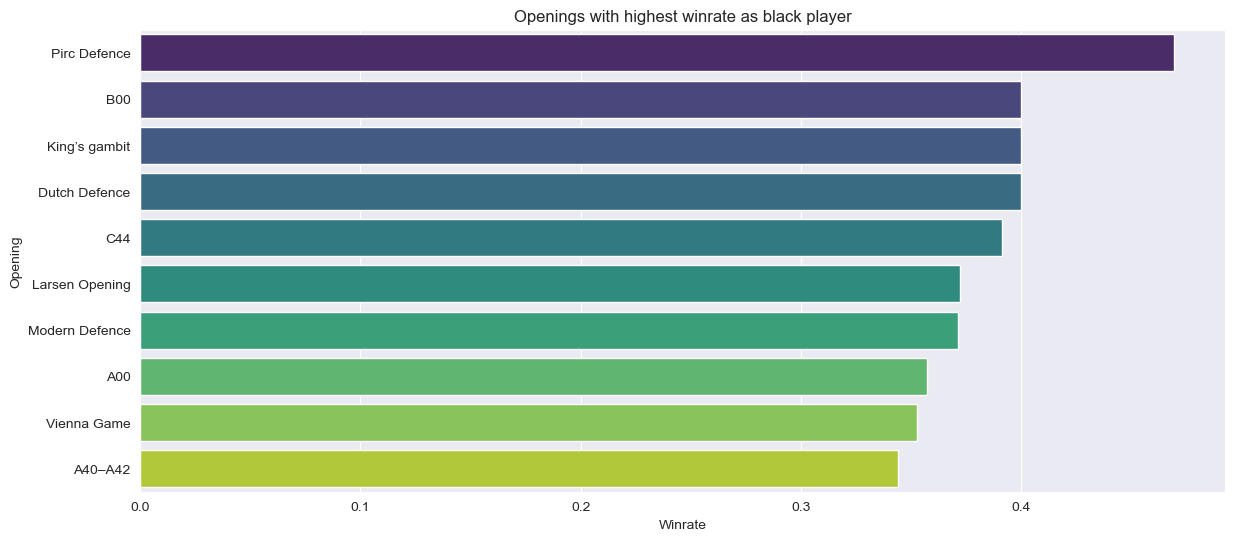

In [10]:
opening_grouped = data.groupby('Opening')['Result'].value_counts(normalize=True).unstack().fillna(0)
opening_grouped['Winrate'] = opening_grouped['0-1']
opening_grouped = opening_grouped.sort_values(by='Winrate', ascending=False).head(10)

plt.figure(figsize=(14, 6))
sns.barplot(x=opening_grouped['Winrate'], y=opening_grouped.index, palette='viridis')
plt.title('Openings with highest winrate as black player')

Openings with highest drawrate.

C:\Users\piotr\.conda\envs\MSID\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\piotr\.conda\envs\MSID\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\piotr\.conda\envs\MSID\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Openings with highest drawrate')

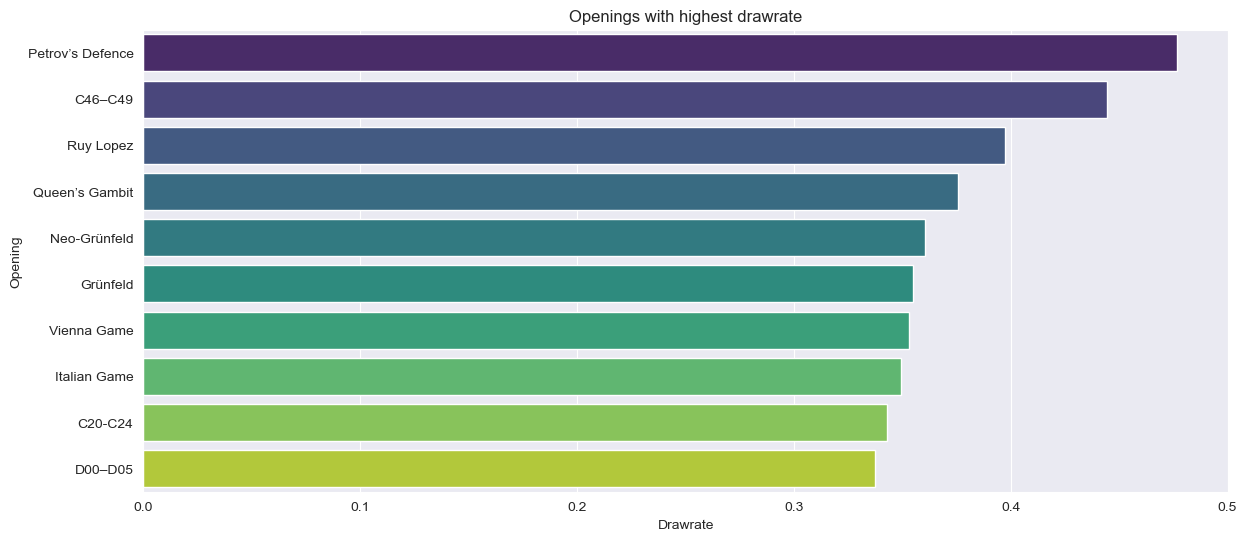

In [11]:
opening_grouped = data.groupby('Opening')['Result'].value_counts(normalize=True).unstack().fillna(0)
opening_grouped['Drawrate'] = opening_grouped['½-½']
opening_grouped = opening_grouped.sort_values(by='Drawrate', ascending=False).head(10)

plt.figure(figsize=(14, 6))
sns.barplot(x=opening_grouped['Drawrate'], y=opening_grouped.index, palette='viridis')
plt.title('Openings with highest drawrate')

We can create a classifier to predict the result of a game based on the features we have. At the beginning will use the following features:
- White player Elo
- Black player Elo

In [12]:
X = data[['White player Elo', 'Black player Elo']]
y = data['Result']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)

We will use SVM, Random Forest and Gradient Boosting classifiers.

Defining functions for finding the best parameters.

In [13]:
def find_best_parameters(model, parameters, X, y, cv=10, verbose=1, n_jobs=-1):
    grid_object = GridSearchCV(model, parameters, scoring=make_scorer(accuracy_score), cv=cv, verbose=verbose,
                               n_jobs=n_jobs)
    grid_object = grid_object.fit(X, y)
    return grid_object.best_estimator_

def printing_best_parameters_for_each_classifier(X_data, y_data):
    svc = SVC(kernel='rbf') # We use rbf kernel because data is not linearly separable
    parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                  'gamma': [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]}
    svc = find_best_parameters(svc, parameters, X_data, y_data, cv=5, verbose=1, n_jobs=-1)
    print(f'Best parameters for SVC: {svc.get_params()}')

    random_forest = RandomForestClassifier()
    parameters = {'n_estimators': [100, 150, 200, 250, 300, 350, 400,
    450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000], 
    'max_features': ['log2', 'sqrt']} 
    random_forest = find_best_parameters(random_forest, parameters, X_data, y_data, cv=5, verbose=1,
    n_jobs=-1) 
    print(f'Best parameters for Random Forest: {random_forest.get_params()}')

    gradient_boosting = GradientBoostingClassifier()
    parameters = {'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400],
                  'max_depth': [3, 4, 5]}
    gradient_boosting = find_best_parameters(gradient_boosting, parameters, X_data, y_data, cv=5, verbose=1, n_jobs=-1)
    print(f'Best parameters for Gradient Boosting: {gradient_boosting.get_params()}')

Finding the best parameters for each classifier.

In [14]:
# printing_best_parameters_for_each_classifier(X_train, y_train)

Training the classifiers.

In [15]:
accuracy_results = {
    'SVM': {},
    'Random Forest': {},
    'Gradient Boosting': {}
}
f1_score_results = {
    'SVM': {},
    'Random Forest': {},
    'Gradient Boosting': {}
}

svc = SVC(kernel='rbf', C=1000, gamma=0.000001)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
accuracy_results['SVM']['Without opening'] = accuracy_score(y_test, y_pred)
f1_score_results['SVM']['Without opening'] = f1_score(y_test, y_pred, average='weighted')

random_forest = RandomForestClassifier(n_estimators=300, max_features='sqrt')
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
accuracy_results['Random Forest']['Without opening'] = accuracy_score(y_test, y_pred)
f1_score_results['Random Forest']['Without opening'] = f1_score(y_test, y_pred, average='weighted')

gradient_boosting = GradientBoostingClassifier(n_estimators=50, max_depth=4)
gradient_boosting.fit(X_train, y_train)
y_pred = gradient_boosting.predict(X_test)
accuracy_results['Gradient Boosting']['Without opening'] = accuracy_score(y_test, y_pred)
f1_score_results['Gradient Boosting']['Without opening'] = f1_score(y_test, y_pred, average='weighted')

for classifier in accuracy_results:
    print(f'{classifier} accuracy: {accuracy_results[classifier]['Without opening']}')
    print(f'{classifier} f1 score: {f1_score_results[classifier]['Without opening']}')

SVM accuracy: 0.511892797319933
SVM f1 score: 0.5028337587015055
Random Forest accuracy: 0.4525963149078727
Random Forest f1 score: 0.4494727337392601
Gradient Boosting accuracy: 0.5179229480737019
Gradient Boosting f1 score: 0.5076564896819672


Best classifier is Gradient Boosting with 0.518 accuracy and 0.508 f1 score, but the results are not satisfying. We can try to improve the results by adding more features to the model. The first feature we will add is Opening.

In [16]:
label_encoder_object = LabelEncoder()
data['Opening coded'] = label_encoder_object.fit_transform(data['Opening'])
X = data[['White player Elo', 'Black player Elo', 'Opening coded']]
y = data['Result']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)

Training the classifiers with the new features.

In [17]:
# printing_best_parameters_for_each_classifier(X_train, y_train)

In [18]:
svc = SVC(kernel='rbf', C=1000, gamma=0.000001)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
accuracy_results['SVM']['With opening'] = accuracy_score(y_test, y_pred)
f1_score_results['SVM']['With opening'] = f1_score(y_test, y_pred, average='weighted')

random_forest = RandomForestClassifier(n_estimators=350, max_features='log2')
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
accuracy_results['Random Forest']['With opening'] = accuracy_score(y_test, y_pred)
f1_score_results['Random Forest']['With opening'] = f1_score(y_test, y_pred, average='weighted')

gradient_boosting = GradientBoostingClassifier(n_estimators=50, max_depth=3)
gradient_boosting.fit(X_train, y_train)
y_pred = gradient_boosting.predict(X_test)
accuracy_results['Gradient Boosting']['With opening'] = accuracy_score(y_test, y_pred)
f1_score_results['Gradient Boosting']['With opening'] = f1_score(y_test, y_pred, average='weighted')

for classifier in accuracy_results:
    print(f'{classifier} accuracy: {accuracy_results[classifier]['With opening']}')
    print(f'{classifier} f1 score: {f1_score_results[classifier]['With opening']}')

SVM accuracy: 0.5145728643216081
SVM f1 score: 0.5048863233920902
Random Forest accuracy: 0.46331658291457284
Random Forest f1 score: 0.4596074146515675
Gradient Boosting accuracy: 0.5185929648241207
Gradient Boosting f1 score: 0.5075330406976458


Adding opening didn't improve the results much. We can try to add Players and Opening Code as a feature.

In [19]:
data['White player coded'] = label_encoder_object.fit_transform(data['White player'])
data['Black player coded'] = label_encoder_object.fit_transform(data['Black player'])
data['Opening Code coded'] = label_encoder_object.fit_transform(data['Opening Code'])
X = data[['White player Elo', 'Black player Elo', 'Opening', 'White player coded', 'Black player coded', 'Opening Code coded']]

Training the classifiers with the new features.

In [20]:
# printing_best_parameters_for_each_classifier(X_train, y_train)

In [21]:
svc = SVC(kernel='rbf', C=1000, gamma=0.000001)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
accuracy_results['SVM']['With all features'] = accuracy_score(y_test, y_pred)
f1_score_results['SVM']['With all features'] = f1_score(y_test, y_pred, average='weighted')

random_forest = RandomForestClassifier(n_estimators=350, max_features='sqrt')
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
accuracy_results['Random Forest']['With all features'] = accuracy_score(y_test, y_pred)
f1_score_results['Random Forest']['With all features'] = f1_score(y_test, y_pred, average='weighted')

gradient_boosting = GradientBoostingClassifier(n_estimators=50, max_depth=3)
gradient_boosting.fit(X_train, y_train)
y_pred = gradient_boosting.predict(X_test)
accuracy_results['Gradient Boosting']['With all features'] = accuracy_score(y_test, y_pred)
f1_score_results['Gradient Boosting']['With all features'] = f1_score(y_test, y_pred, average='weighted')

for classifier in accuracy_results:
    print(f'{classifier} accuracy: {accuracy_results[classifier]['With all features']}')
    print(f'{classifier} f1 score: {f1_score_results[classifier]['With all features']}')

SVM accuracy: 0.5145728643216081
SVM f1 score: 0.5048863233920902
Random Forest accuracy: 0.46934673366834173
Random Forest f1 score: 0.4651725290576069
Gradient Boosting accuracy: 0.5185929648241207
Gradient Boosting f1 score: 0.5075330406976458


Results are still not satisfying. We can try predicting if the game will be draw or not.

In [22]:
data['Is draw'] = data['Result'].map({'1-0': 0, '½-½': 1, '0-1': 0})
X = data[['White player Elo', 'Black player Elo', 'Opening coded', 'White player coded', 'Black player coded', 'Opening Code coded']]
y = data['Is draw']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)

Training the classifiers predicting if the game will be draw or not.

In [23]:
# printing_best_parameters_for_each_classifier(X_train, y_train)

In [24]:
svc = SVC(kernel='rbf', C=1000, gamma=0.000001)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
accuracy_results['SVM']['Draw prediction'] = accuracy_score(y_test, y_pred)
f1_score_results['SVM']['Draw prediction'] = f1_score(y_test, y_pred, average='weighted')

random_forest = RandomForestClassifier(n_estimators=550, max_features='log2')
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
accuracy_results['Random Forest']['Draw prediction'] = accuracy_score(y_test, y_pred)
f1_score_results['Random Forest']['Draw prediction'] = f1_score(y_test, y_pred, average='weighted')

gradient_boosting = GradientBoostingClassifier(n_estimators=50, max_depth=3)
gradient_boosting.fit(X_train, y_train)
y_pred = gradient_boosting.predict(X_test)
accuracy_results['Gradient Boosting']['Draw prediction'] = accuracy_score(y_test, y_pred)
f1_score_results['Gradient Boosting']['Draw prediction'] = f1_score(y_test, y_pred, average='weighted')

for classifier in accuracy_results:
    print(f'{classifier} accuracy: {accuracy_results[classifier]['Draw prediction']}')
    print(f'{classifier} f1 score: {f1_score_results[classifier]['Draw prediction']}')

SVM accuracy: 0.6958123953098827
SVM f1 score: 0.5920713593878144
Random Forest accuracy: 0.6944723618090453
Random Forest f1 score: 0.6442135110745337
Gradient Boosting accuracy: 0.7102177554438861
Gradient Boosting f1 score: 0.6289799767157813


Results are much better when predicting if the game will be draw or not. The best classifier is Gradient Boosting with 0.71 accuracy and 0.63 f1 score.

We can check if all these features are necessary for the model. We will try to predict if the game will be draw or not with only Elo features.

In [25]:
data['Is draw'] = data['Result'].map({'1-0': 0, '½-½': 1, '0-1': 0})
X = data[['White player Elo', 'Black player Elo']]
y = data['Is draw']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)

# printing_best_parameters_for_each_classifier(X_train, y_train)

svc = SVC(kernel='rbf', C=1000, gamma=0.000001)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
accuracy_results['SVM']['Draw prediction with only Elo'] = accuracy_score(y_test, y_pred)
f1_score_results['SVM']['Draw prediction with only Elo'] = f1_score(y_test, y_pred, average='weighted')

random_forest = RandomForestClassifier(n_estimators=550, max_features='log2')
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
accuracy_results['Random Forest']['Draw prediction with only Elo'] = accuracy_score(y_test, y_pred)
f1_score_results['Random Forest']['Draw prediction with only Elo'] = f1_score(y_test, y_pred, average='weighted')

gradient_boosting = GradientBoostingClassifier(n_estimators=50, max_depth=3)
gradient_boosting.fit(X_train, y_train)
y_pred = gradient_boosting.predict(X_test)
accuracy_results['Gradient Boosting']['Draw prediction with only Elo'] = accuracy_score(y_test, y_pred)
f1_score_results['Gradient Boosting']['Draw prediction with only Elo'] = f1_score(y_test, y_pred, average='weighted')

for classifier in accuracy_results:
    print(f'{classifier} accuracy: {accuracy_results[classifier]['Draw prediction with only Elo']}')
    print(f'{classifier} f1 score: {f1_score_results[classifier]['Draw prediction with only Elo']}')

SVM accuracy: 0.6958123953098827
SVM f1 score: 0.571000531433673
Random Forest accuracy: 0.6589614740368509
Random Forest f1 score: 0.6359044237440376
Gradient Boosting accuracy: 0.7018425460636516
Gradient Boosting f1 score: 0.6201796415779427


Visualizing the results.

C:\Users\piotr\.conda\envs\MSID\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\piotr\.conda\envs\MSID\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\piotr\.conda\envs\MSID\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\Users\piotr\.conda\envs\MSID\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if p

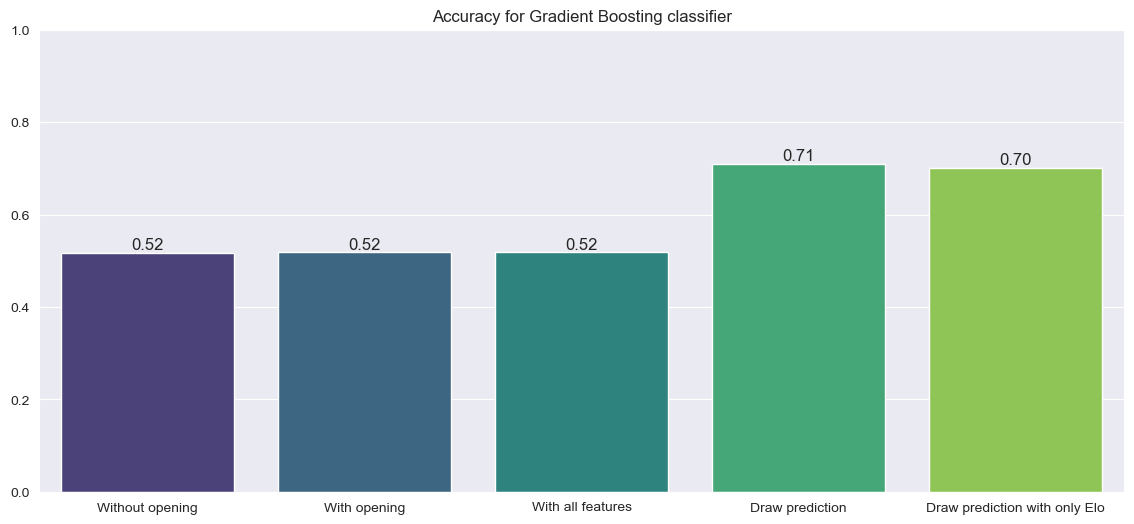

In [26]:
plt.figure(figsize=(14, 6))
barplot = sns.barplot(x=list(accuracy_results['Gradient Boosting'].keys()), y=list(accuracy_results['Gradient Boosting'].values()), palette='viridis')
plt.title('Accuracy for Gradient Boosting classifier')

for patch in barplot.patches:
    barplot.text(patch.get_x() + patch.get_width()/2., patch.get_height(), '{0:.2f}'.format(patch.get_height()), 
        fontsize=12, ha='center', va='bottom')

plt.ylim(0.0, 1.0)

plt.show()